<a href="https://colab.research.google.com/github/f3rry12/FGA-BigDataTraining/blob/main/GenerateDataSimulasiperamalanstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pengembangan Big Data App untuk Prediksi Stock perusahaan EA pada Data Simulasi Trending dan Query Scrapping Twitter

In [ ]:
import datetime
import pandas as pd
import numpy as np

kolomFitur_X_plus_Target_Y = ['Count All (X1)','Count Positive Review (X2)', 'Count Negative Review (X3)','Stock Open (Y)']

# Interval atau Variasi nilai fitur
CountAll = [5000,303500]
CountPos = [2500,20000]
CountNeg = [2500,20000]
labelTargetY = [110.0,165.0]

# set bykData = 3*np.power(10,7)
bykData = 10000000
bykFitur = len(kolomFitur_X_plus_Target_Y)-1

print('Banyak Data = ', bykData)
print('Banyak Fitur = ', bykFitur)

# generate isi dataset
content_dataGenerate = np.array([np.arange(bykData)]*(bykFitur+1)).T
df_gen = pd.DataFrame(content_dataGenerate, columns=kolomFitur_X_plus_Target_Y)

# set secara random nilai Fitur untuk generate data
df_gen ['Count All (X1)'] = np.random.randint(CountAll[0], CountAll[1], df_gen.shape[0])
df_gen ['Count Positive Review (X2)'] = np.random.randint(CountPos[0], CountPos[1], df_gen.shape[0])
df_gen ['Count Negative Review (X3)'] = np.random.randint(CountNeg[0], CountNeg[1], df_gen.shape[0])
df_gen ['Stock Open (Y)'] = np.random.uniform(labelTargetY[0], labelTargetY[1], df_gen.shape[0])

# save dataframe generate ke *.csv
file_name_data_generate = 'Data_Generate_EA.csv'
df_gen.to_csv(file_name_data_generate, encoding='utf-8', index=False)

# read file *.csv dan tampilkan
data_generate = pd.read_csv(file_name_data_generate)

# Menampilkan data
print('\nMenampilkan hasil generate dataset:')
display(data_generate)

Banyak Data =  10000000
Banyak Fitur =  3

Menampilkan hasil generate dataset:


,Count All (X1),Count Positive Review (X2),Count Negative Review (X3),Stock Open (Y)
0,245563,11951,17919,115.576511
1,62252,3873,18257,130.853266
2,124549,3358,18870,116.817303
3,261581,14445,9885,126.890647
4,159295,16283,10355,132.490840
...,...,...,...,...
9999995,144809,17363,18116,126.876476
9999996,128753,12629,8538,121.731638
9999997,99388,13167,6297,152.144425
9999998,129715,19949,12920,121.869029


In [ ]:
EA_df = pd.read_csv('Data_Generate_EA.csv').head(30)   #perhatikan nama file csv
EA_df

,Count All (X1),Count Positive Review (X2),Count Negative Review (X3),Stock Open (Y)
0,245563,11951,17919,115.576511
1,62252,3873,18257,130.853266
2,124549,3358,18870,116.817303
3,261581,14445,9885,126.890647
4,159295,16283,10355,132.490840
5,249945,14887,12025,139.682610
6,291860,15111,15040,160.090419
7,119682,4807,12618,123.187479
8,48796,16377,5457,130.379117
9,193076,7992,2935,127.590072


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

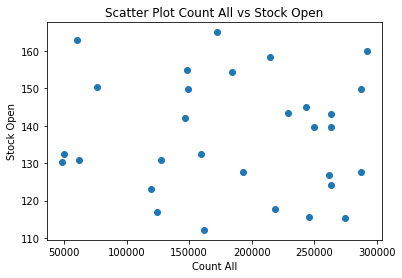

In [ ]:
#Bivariate analysis Count All dan Stock Open
#Menggunakan scatter plot
plt.scatter(EA_df['Count All (X1)'], EA_df['Stock Open (Y)'])
plt.xlabel('Count All')
plt.ylabel('Stock Open')
plt.title('Scatter Plot Count All vs Stock Open')
plt.show()

In [ ]:
#Modelling
#Pertama, buat variabel x dan y
x = EA_df['Count All (X1)'].values.reshape(-1,1)
y = EA_df['Stock Open (Y)'].values.reshape(-1,1)

#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

#cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

#accuracy score
lin_reg.score(x_test, y_test)

[[4.15790528e-05]]
[126.46461294]


-1.4680644365328894

Text(0.5, 1.0, 'All Count vs Stock Open')

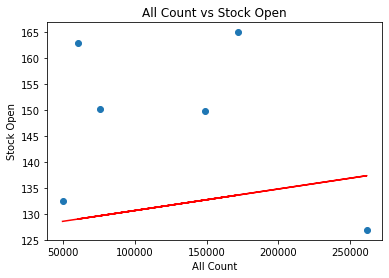

In [ ]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('All Count')
plt.ylabel('Stock Open')
plt.title('All Count vs Stock Open')

In [ ]:
#Prediksi Stock Open dengan tweet count 12000
lin_reg.predict([[12000]])

array([[126.96356157]])